### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Per_hour', 'Salary', 'Min_salary',
       'Max_salary', 'Average_salary', 'Job_State', 'Company_age', 'Python_yn',
       'AI_yn', 'ML_yn', 'Statistic_yn', 'Simplified_title', 'Seniority',
       'desc_len'],
      dtype='object')

In [4]:
df.describe()

,Rating,Founded,Per_hour,Min_salary,Max_salary,Average_salary,Company_age,Python_yn,AI_yn,ML_yn,Statistic_yn,desc_len
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,2.952444,1375.768889,0.222222,107.000000,154.555556,112.555556,33.835556,0.035556,0.542222,0.035556,0.191111,1000.564444
std,1.902490,908.946000,0.416667,31.213264,32.318695,28.051933,45.475509,0.185592,0.499325,0.185592,0.394053,747.527685
min,-1.000000,-1.000000,0.000000,34.000000,68.000000,53.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,266.000000
25%,3.100000,-1.000000,0.000000,94.000000,145.000000,82.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,658.000000
50%,3.600000,1962.000000,0.000000,100.000000,156.000000,122.000000,17.000000,0.000000,1.000000,0.000000,0.000000,841.000000
75%,4.100000,1999.000000,0.000000,120.000000,174.000000,132.500000,48.000000,0.000000,1.000000,0.000000,0.000000,1089.000000
max,5.000000,2020.000000,1.000000,154.000000,210.000000,169.500000,179.000000,1.000000,1.000000,1.000000,1.000000,7083.000000


### 1.Continuous variables

#### Histograms

<AxesSubplot:>

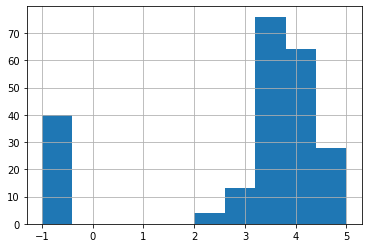

In [5]:
df.Rating.hist()

<AxesSubplot:>

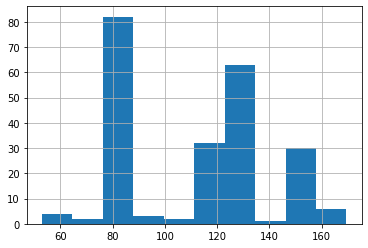

In [7]:
df.Average_salary.hist()

<AxesSubplot:>

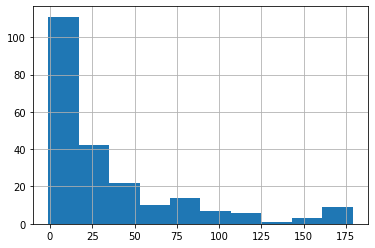

In [8]:
df.Company_age.hist()

**Company age follows an exponential distribution, so if we will use it in our data we have to normalize it (especially if we are using regression)**

<AxesSubplot:>

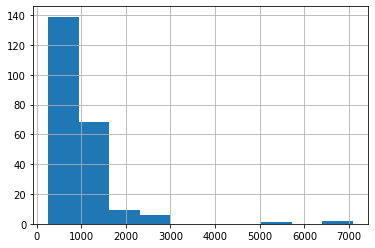

In [9]:
df.desc_len.hist()

**Description length also follows an exponential distribution**

#### Boxplots (Looking for Outliers)

<AxesSubplot:>

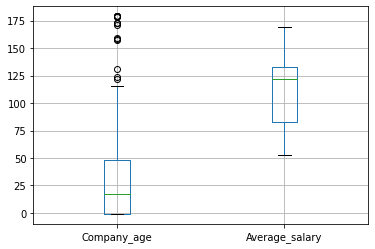

In [10]:
df.boxplot(column=['Company_age', 'Average_salary'])

<AxesSubplot:>

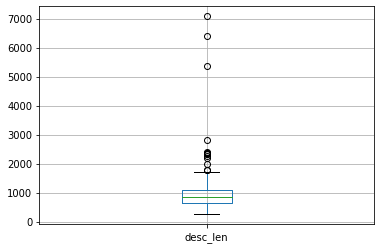

In [11]:
df.boxplot(column='desc_len')

**We can see some outliers in the Company_age and Desc_len columns**

<AxesSubplot:>

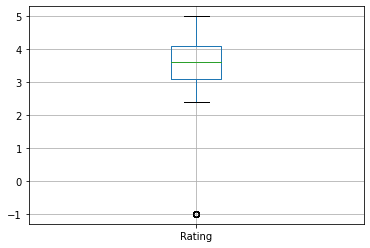

In [12]:
df.boxplot(column='Rating')

#### Correlations

In [13]:
df[['Rating', 'Company_age', 'Average_salary', 'desc_len']].corr()

,Rating,Company_age,Average_salary,desc_len
Rating,1.000000,0.324315,0.116135,0.086166
Company_age,0.324315,1.000000,-0.026082,0.241912
Average_salary,0.116135,-0.026082,1.000000,0.018669
desc_len,0.086166,0.241912,0.018669,1.000000


Text(0.5, 1.0, 'Correlation HeatMap')

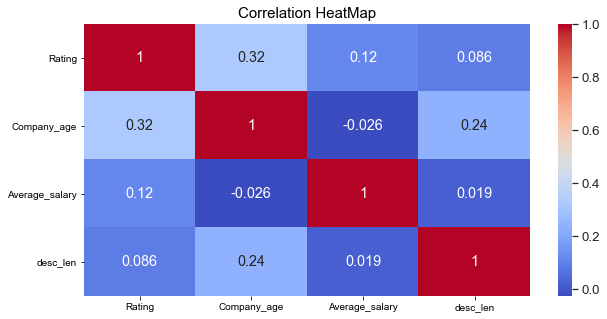

In [14]:
# Correlation matrix between numerical values 

f, ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale=1.2)
sns.heatmap(df[['Rating', 'Company_age', 'Average_salary', 'desc_len']].corr(), annot=True, ax=ax, cmap = "coolwarm")
ax.set_title('Correlation HeatMap', fontsize=15)

* 'Rating' is positively correlated with 'Company_age' and 'Average_salary'
* 'Company_age' is positively correlated with 'Rating' and 'desc_len' 
* 'Average_salary' is positively correlated with 'Rating'
* 'desc_len' is positively correlated with 'Company_age'

**There is no much correlation between independent features: no multicollinearity issue**

### 2.Categorical variables

In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Per_hour', 'Salary', 'Min_salary',
       'Max_salary', 'Average_salary', 'Job_State', 'Company_age', 'Python_yn',
       'AI_yn', 'ML_yn', 'Statistic_yn', 'Simplified_title', 'Seniority',
       'desc_len'],
      dtype='object')

In [16]:
df_categorical = df[['Company Name','Location','Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
   'Job_State', 'Python_yn', 'AI_yn', 'ML_yn', 'Statistic_yn', 'Simplified_title', 'Seniority']]

#### Barplots

Graph for Company Name: total = 164


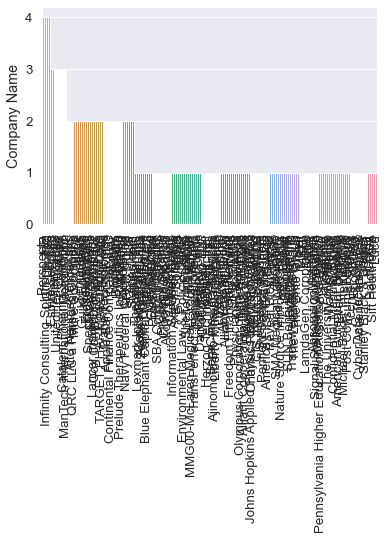

Graph for Location: total = 124


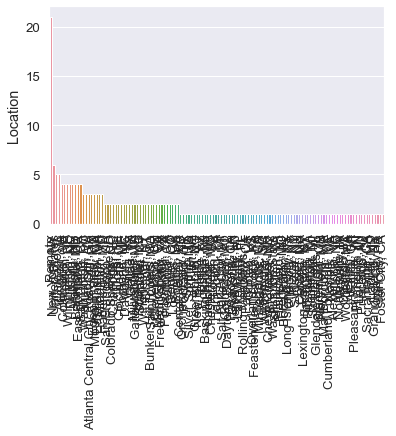

Graph for Size: total = 9


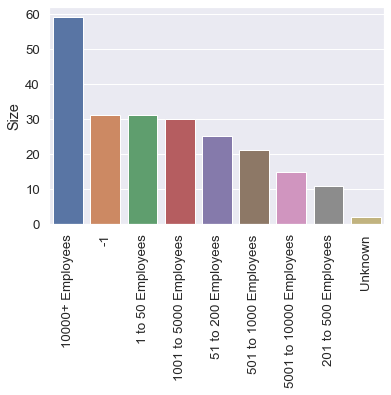

Graph for Type of ownership: total = 10


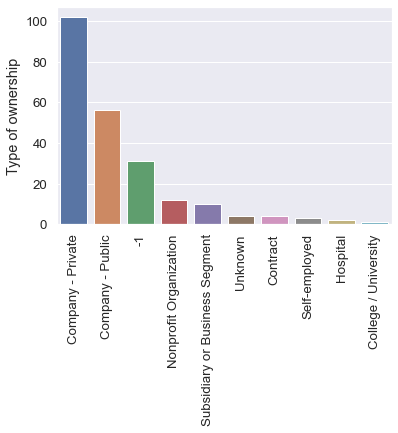

Graph for Industry: total = 37


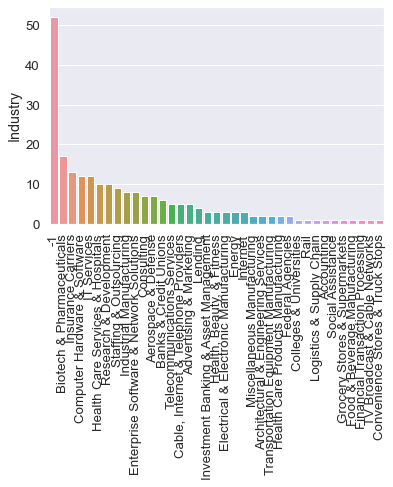

Graph for Sector: total = 20


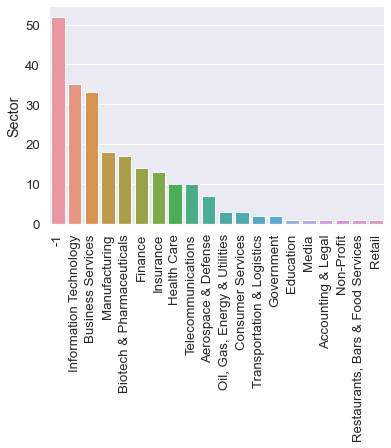

Graph for Revenue: total = 14


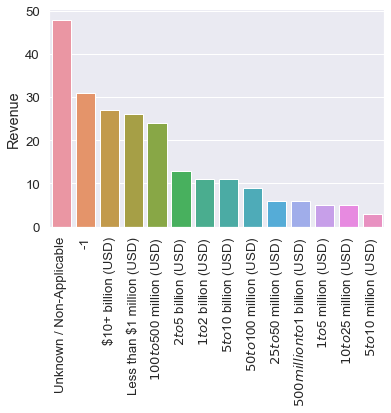

Graph for Job_State: total = 36


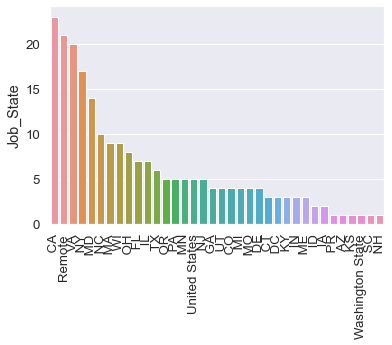

Graph for Python_yn: total = 2


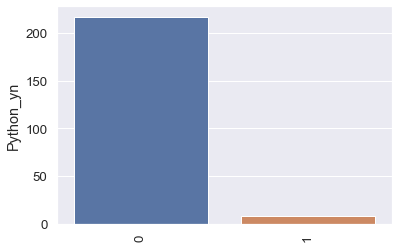

Graph for AI_yn: total = 2


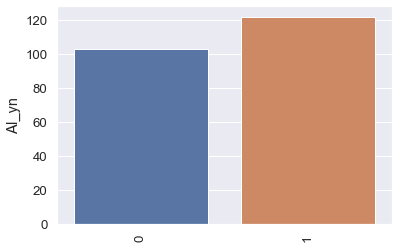

Graph for ML_yn: total = 2


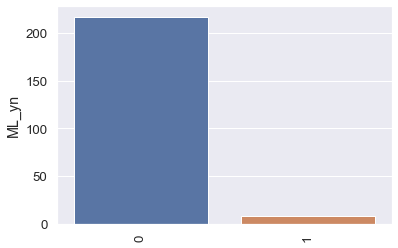

Graph for Statistic_yn: total = 2


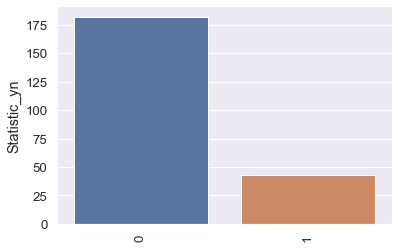

Graph for Simplified_title: total = 7


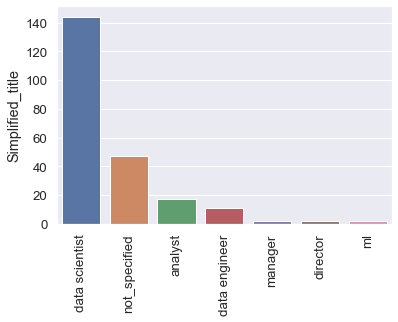

Graph for Seniority: total = 3


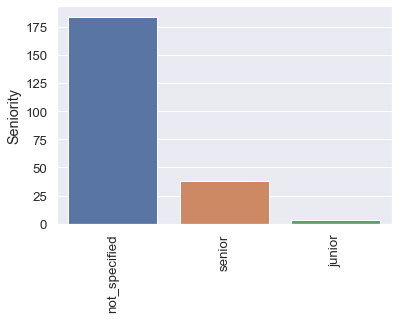

In [17]:
for i in df_categorical.columns:
    categorical_num = df_categorical[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(categorical_num)))
    chart = sns.barplot(x=categorical_num.index, y=categorical_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


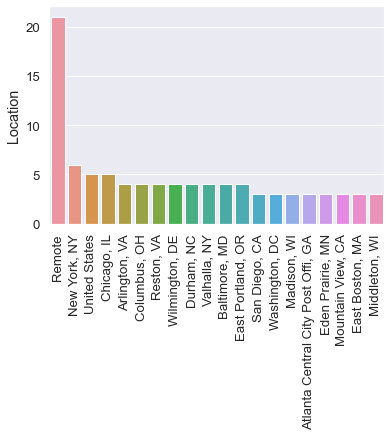

Graph for Company Name: total = 20


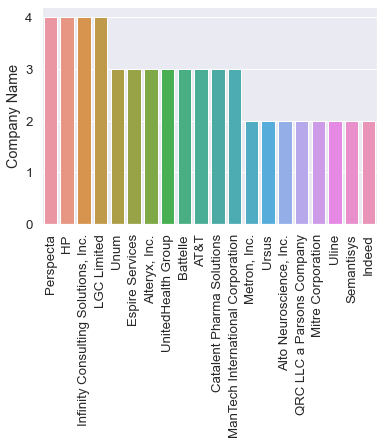

In [18]:
for i in df_categorical[['Location', 'Company Name']]:
    categorical_num = df_categorical[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(categorical_num)))
    chart = sns.barplot(x=categorical_num.index, y=categorical_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

#### Pivot tables

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Per_hour', 'Salary', 'Min_salary',
       'Max_salary', 'Average_salary', 'Job_State', 'Company_age', 'Python_yn',
       'AI_yn', 'ML_yn', 'Statistic_yn', 'Simplified_title', 'Seniority',
       'desc_len'],
      dtype='object')

In [21]:
pd.pivot_table(df, index='Simplified_title', values='Average_salary').sort_values('Average_salary', ascending=False)

,Average_salary
Simplified_title,
data scientist,116.065972
data engineer,112.045455
not_specified,107.617021
analyst,107.441176
director,82.500000
manager,82.500000
ml,82.250000


In [22]:
pd.pivot_table(df, index=['Simplified_title', 'Seniority'], values='Average_salary').sort_values('Average_salary', ascending=False)

Average_salary
Simplified_title Seniority                    
analyst          senior             138.250000
data scientist   senior             123.600000
                 not_specified      114.658120
data engineer    not_specified      112.045455
not_specified    senior             110.333333
                 not_specified      107.635135
data scientist   junior             104.250000
analyst          not_specified      103.333333
director         senior              82.500000
manager          not_specified       82.500000
not_specified    junior              82.500000
ml               not_specified       82.250000

In [23]:
pd.pivot_table(df, index='Job_State', values='Average_salary').sort_values('Average_salary', ascending=False)

,Average_salary
Job_State,
SC,126.500000
NH,126.500000
KY,125.000000
DC,125.000000
IN,123.500000
GA,122.750000
Washington State,122.000000
PR,122.000000
IL,119.428571


In [24]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [25]:
pd.pivot_table(df, index=['Job_State','Simplified_title'] , values='Average_salary', aggfunc='count')

Average_salary
Job_State        Simplified_title                
 AZ              data scientist                 1
 CA              analyst                        1
                 data scientist                16
                 not_specified                  6
 CO              data scientist                 3
                 manager                        1
 CT              data scientist                 3
 DC              data engineer                  1
                 data scientist                 2
 DE              data scientist                 2
                 director                       1
                 not_specified                  1
 FL              data engineer                  1
                 data scientist                 4
                 not_specified                  2
 GA              analyst                        1
                 data scientist                 2
                 not_specified                  1
 IA              data scientist                 1
                 not_specified                  1
 ID              data scientist                 2
 IL              data scientist                 6
                 not_specified                  1
 IN              analyst                        2
                 not_specified                  1
 KS              data scientist                 1
 KY              data scientist                 1
                 not_specified                  2
 MA              data engineer                  1
                 data scientist                 5
                 not_specified                  3
 MD              data engineer                  1
                 data scientist                 8
                 not_specified                  5
 ME              data scientist                 2
                 not_specified                  1
 MI              analyst                        1
                 data engineer                  1
                 not_specified                  2
 MN              data scientist                 3
                 not_specified                  2
 MO              analyst                        1
                 data scientist                 2
                 not_specified                  1
 NC              data scientist                 9
                 not_specified                  1
 NH              data engineer                  1
 NJ              data scientist                 3
                 director                       1
                 not_specified                  1
 NY              analyst                        3
                 data scientist                12
                 manager                        1
                 not_specified                  1
 OH              analyst                        1
                 data engineer                  1
                 data scientist                 5
                 not_specified                  1
 OR              data scientist                 4
                 not_specified                  1
 PA              analyst                        1
                 data engineer                  1
                 data scientist                 1
                 not_specified                  2
 PR              not_specified                  1
 SC              not_specified                  1
 TX              data engineer                  1
                 data scientist                 5
 UT              data engineer                  1
                 data scientist                 3
 VA              analyst                        1
                 data scientist                17
                 not_specified                  2
 WI              analyst                        2
                 data engineer                  1
                 data scientist                 2
                 not_specified                  4
Remote           analyst                        1
                 data scientist    

In [26]:
pd.pivot_table(df[df['Simplified_title']=='data scientist'], index=['Job_State'] , values='Average_salary').sort_values('Average_salary', ascending=False)

,Average_salary
Job_State,
KY,126.500000
IL,125.583333
DC,124.250000
FL,124.250000
CA,123.406250
ME,122.000000
MN,121.500000
United States,121.500000
VA,120.470588


In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Per_hour', 'Salary', 'Min_salary',
       'Max_salary', 'Average_salary', 'Job_State', 'Company_age', 'Python_yn',
       'AI_yn', 'ML_yn', 'Statistic_yn', 'Simplified_title', 'Seniority',
       'desc_len'],
      dtype='object')

In [28]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue','Per_hour', 'Python_yn', 'AI_yn', 'ML_yn', 'Statistic_yn', 'Type of ownership', 'Average_salary']]

In [29]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'Average_salary').sort_values('Average_salary', ascending = False))

Rating
        Average_salary
Rating                
 3.3        132.500000
 2.4        132.500000
 4.1        126.611111
 4.3        125.571429
 4.5        123.000000
 4.4        122.214286
 3.6        119.148148
 4.0        118.200000
 4.7        118.000000
 3.8        116.653846
 4.2        115.464286
 3.2        114.357143
 3.7        113.535714
 4.6        110.333333
 3.5        109.375000
 3.4        108.636364
-1.0        107.037500
 3.9        106.590909
 4.8        104.500000
 5.0        101.833333
 2.5        101.333333
 2.7         97.166667
 3.1         96.300000
 2.8         90.500000
 3.0         82.000000
Industry
                                         Average_salary
Industry                                               
Grocery Stores & Supermarkets                169.500000
TV Broadcast & Cable Networks                132.500000
Logistics & Supply Chain                     132.500000
Colleges & Universities                      132.500000
Staffing & Outsourcing     

ValueError: Grouper for 'Average_salary' not 1-dimensional

In [30]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'AI_yn', values = 'Average_salary', aggfunc = 'count')

AI_yn,0,1
Revenue,,
$1 to $2 billion (USD),7.0,4.0
$1 to $5 million (USD),1.0,4.0
$10 to $25 million (USD),2.0,3.0
$10+ billion (USD),6.0,21.0
$100 to $500 million (USD),13.0,11.0
$2 to $5 billion (USD),8.0,5.0
$25 to $50 million (USD),NaN,6.0
$5 to $10 billion (USD),5.0,6.0
$5 to $10 million (USD),2.0,1.0


### Generating WordCloud

In [31]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [32]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

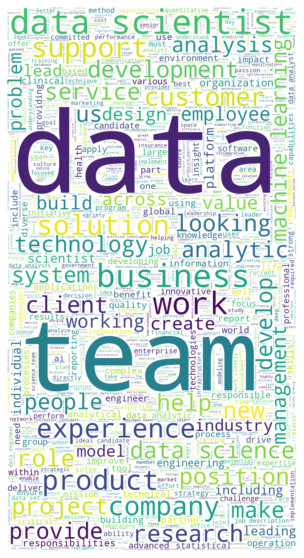

In [33]:
words = " ".join(df['Job Description'])

def clean_words(text):
    """
    remove punctuation and stop words
    """
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered  

words_filtered = clean_words(words)

text = " ".join([element for element in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()